# Visualizing COVID-19 Cases in Toronto by Age Group

This notebook generates a histogram to visualize the episode dates of individuals in Toronto who contracted COVID-19. An episode date is an estimate of when the individual actually acquired the disease and may not be the the same date during which the case was reported.

Data on COVID-19 cases in Toronto were obtained from the City of Toronto’s Open Data Portal. The histogram displays a subset of the cases who belong to a certain age group. The following age groups were collected in the data.

* 19 and younger
* 20 to 29
* 30 to 39
* 40 to 49
* 50 to 59
* 60 to 69
* 70 to 79
* 80 to 89
* 90 and older

Selecting a new age group from the histogram's dropdown menu will redraw the histogram of COVID-19 episode dates for individuals within the new age group.

In [1]:
# imports
from IPython.display import clear_output, display
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

In [2]:
# get the data using the CKAN API
# see https://open.toronto.ca/dataset/covid-19-cases-in-toronto/ for the dataset and API instructions
url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show'
params = { 'id': 'covid-19-cases-in-toronto'}
package = requests.get(url, params = params).json()
resource = package['result']['resources']['name' == 'COVID19 cases.csv']
url = resource['url']
data = pd.read_csv(url)

In [3]:
# wrangle the data for easy visualization later
plot_data = data[['Age Group', 'Episode Date']]
plot_data = plot_data.sort_values('Episode Date')
plot_data = plot_data.groupby(plot_data.columns.tolist()).size()
age_groups = [
    '19 and younger',
    '20 to 29 Years',
    '30 to 39 Years',
    '40 to 49 Years',
    '50 to 59 Years',
    '60 to 69 Years',
    '70 to 79 Years',
    '80 to 89 Years',
    '90 and older'
]

Dropdown(description='Age Group:', options=('19 and younger', '20 to 29 Years', '30 to 39 Years', '40 to 49 Ye…

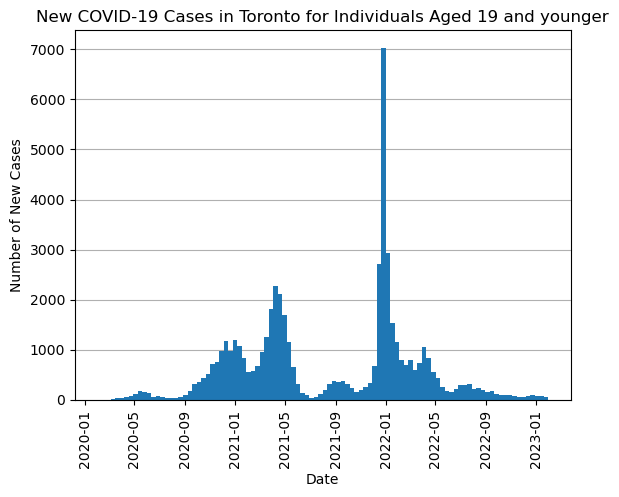

In [4]:
# create a dropdown menu to allow the user to select an age group
def add_widget(age_group: str) -> None:
    age_widget = widgets.Dropdown(
        options=age_groups,
        value=age_group,
        description='Age Group:'
    )
    age_widget.observe(lambda a: plot_age_group(a['new']), 'value')
    display(age_widget)

# plot a histogram of COVID-19 cases in Toronto for the selected age group
def plot_age_group(age_group: str) -> None:
    clear_output()
    add_widget(age_group)
    # create an array of dates
    plot_data_ag = plot_data.filter(like=age_group)
    x = zip(*plot_data_ag.index)
    episode_date = []
    for i in x:
        episode_date.append(i)
    episode_date = np.asarray(episode_date[1], dtype='datetime64')
    # get the number of new cases per day
    cases = plot_data_ag.values
    # plot the data
    plt.hist(episode_date, bins=100, weights=cases, zorder=2)
    plt.grid(axis='y', clip_on=False, zorder=1)
    plt.xlabel('Date')
    plt.xticks(rotation='vertical')
    plt.ylabel('Number of New Cases')
    plt.title(f'New COVID-19 Cases in Toronto for Individuals Aged {age_group}')
    plt.show()
    
# initialize the visualization
plot_age_group('19 and younger')